Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


D:\games\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.7457 - loss: 0.7644 - val_accuracy: 0.8125 - val_loss: 0.3456
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.8952 - loss: 0.2640 - val_accuracy: 0.8125 - val_loss: 0.4524
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.9099 - loss: 0.2358 - val_accuracy: 0.8125 - val_loss: 0.4900
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.9069 - loss: 0.2370 - val_accuracy: 0.7500 - val_loss: 0.6181
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9091 - loss: 0.2239 - val_accuracy: 0.9375 - val_loss: 0.4111
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 503ms/step - accuracy: 0.8157 - loss: 0.5474
Test Loss: 0.3600144684314728, Test Accuracy: 0.879807710647583


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


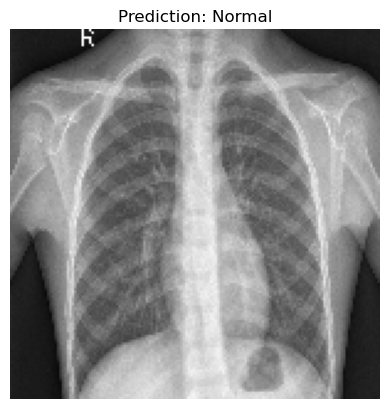

Image: C:\Users\Atharva\Desktop\chest_xray\test\NORMAL\IM-0001-0001.jpeg -> Prediction: Normal
Please provide valid image path(s)


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Directories for the dataset
train_dir = r"C:\Users\Atharva\Desktop\chest_xray\train"
val_dir = r"C:\Users\Atharva\Desktop\chest_xray\val"
test_dir = r"C:\Users\Atharva\Desktop\chest_xray\test"

# Parameters
img_width, img_height = 150, 150
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1.0 / 255, horizontal_flip=True, zoom_range=0.2)
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode="binary")
val_generator = val_test_datagen.flow_from_directory(val_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode="binary")
test_generator = val_test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode="binary", shuffle=False)

# Simple CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# Compile the Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the Model
history = model.fit(train_generator, validation_data=val_generator, epochs=5)

# Evaluate the Model
eval_result = model.evaluate(test_generator)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

# Save the Model
model.save("pneumonia_detection_model.h5")

# Predict and Display Image
def classify_new_image(image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    outcome = "Pneumonia" if prediction[0][0] > 0.5 else "Normal"
    plt.imshow(img)
    plt.title(f"Prediction: {outcome}")
    plt.axis('off')
    plt.show()
    return outcome

# Example Usage
try:
    test_images = [
        r"C:\Users\Atharva\Desktop\chest_xray\test\NORMAL\IM-0001-0001.jpeg",
        r"C:\Users\Atharva\Desktop\chest_xray\test\PNEUMONIA\person1_bacteria_1.jpeg"
    ]
    
    for image_path in test_images:
        outcome = classify_new_image(image_path)
        print(f"Image: {image_path} -> Prediction: {outcome}")

except FileNotFoundError:
    print("Please provide valid image path(s)")
